In [1]:
all_6models = [
    "gold",
    "chatgpt",
    "flan-t5-xxl",
    "alpaca-7B",
    "alpaca-13B",
    "dolly-v2-7B",
    "dolly-v2-12B"
    ]

In [2]:
top_3models = [
    "gold",
    "chatgpt",
    "flan-t5-xxl",
    "alpaca-7B"
    ]

In [3]:
# In main paper, top 3 models   --> if_top3_models = True
# In appendix, all 6 models     --> if_top3_models = False
if_top3_models = True

### Analyze the responses

In [4]:
import pandas as pd

file_name_1 = "TURKERS-EVAL_data-intersection-ALL_6_models.csv"
file_name_2 = "TURKERS-EVAL_data-intersection-TOP_3_models.csv"

if if_top3_models == True:
    eval_df = pd.concat([
        pd.read_csv(file_name_1),#.drop(columns=["Scale"]),
        pd.read_csv(file_name_2),#.drop(columns=["Scale"]),
    ])
    eval_df = eval_df[eval_df["Model"].isin(top_3models)]
else:
    eval_df = pd.read_csv(file_name_1)#,.drop(columns=["Scale"])

len(eval_df)

606

### How many dims does it cover?

In [5]:
all_dims = list(range(1, 25))
remove_dims = [16, 18, 23]
res_dims = [x for x in all_dims if x not in remove_dims]

set(res_dims) - set([int(i.replace("dim", "")) for i in eval_df["Dim"]])

{3, 13}

### NA percentage in human eval?

In [6]:
eval_df_gold_only = eval_df[eval_df["Model"] == "gold"]
for gold_scale in list(eval_df_gold_only["Scale"]):
    if gold_scale not in list(range(1, 10)):
        print (gold_scale)

In [13]:
import numpy as np

for model in np.unique(eval_df["Model"]):
    single_model_eval_df = eval_df[eval_df["Model"] == model]
    #display (single_model_eval_df)
    print (model, int(len(single_model_eval_df) / 2))

,HIT ID,Assignment ID,Worker ID,Reddit ID,Reddit Post,Dim,Model,Scale,Rationale,factuality,justifies,relevance,usefulness
2,3VP28W7DUNJ8OKXAQ5KH5MKE259FZD,3I33IC7ZWG1P92BKGKUCSUV6OWT2AV,AKA8TN8H8DQ6T,o7hz16,My country is in a third wave. Its never endin...,dim4,alpaca-7B,3,The narrator thought they were able to cope wi...,minor,yes,3,maybe
3,3VP28W7DUNJ8OKXAQ5KH5MKE259FZD,358010RM5FSA26HFF461E73FMGQVXX,A2MO3EE6D0P3KR,o7hz16,My country is in a third wave. Its never endin...,dim4,alpaca-7B,3,The narrator thought they were able to cope wi...,no,no,2,no
18,3VMHWJRYHVFJJPXVPNWW8143U6LFXS,3JPSL1DZ5TYLYO0D23SWKIY4ZUNAN3,A1KEA2Z47S3UPI,o7lkru,"Recently, the Israeli government reinstituted ...",dim8,alpaca-7B,5,The narrator thought they were able to control...,no,yes,5,no
19,3VMHWJRYHVFJJPXVPNWW8143U6LFXS,3PW9OPU9PRJTFEYKK11JHT23K6012R,AKA8TN8H8DQ6T,o7lkru,"Recently, the Israeli government reinstituted ...",dim8,alpaca-7B,5,The narrator thought they were able to control...,minor,yes,4,maybe
32,3MA5N0ATTCAFABKJGTR7MVI1T0WKW6,34T446B1C1D66754LBMPF1SFR580CX,AKA8TN8H8DQ6T,o7y52c,The following has been my experience: Started ...,dim14,alpaca-7B,5,The narrator was certain that they had Covid s...,yes,yes,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,3XU80RHWHZFIN7CWLVY8KMAEC9Z44I,3B2X28YI3XEIADZD906BDIWOWZV6BW,AKA8TN8H8DQ6T,o7hz16,My country is in a third wave. Its never endin...,dim8,alpaca-7B,3,The narrator thought they were able to control...,yes,yes,5,yes
370,34F34TZU7WYYNBGUKO2OX92ZAST2JB,3DYGAII7PM7DOPJ77E2AE7I4D39QPJ,A1KEA2Z47S3UPI,o8ejot,I have been realizing that I've been spiraling...,dim9,alpaca-7B,5,The narrator believes that other people had so...,yes,yes,5,no
371,3N3WJQXELSP4I14UN9E1DOFRFJSL2V,30JNVC0ORAJLB8LJO1U55YGDRQEHQC,A2A6FH0F7LD9ND,o8ejot,I have been realizing that I've been spiraling...,dim9,alpaca-7B,5,The narrator believes that other people had so...,yes,yes,5,yes
380,3H5TOKO3D9IW2UGA4JRNHKUS805463,3EICBYG645VD8D6Q7JWVX67B0P5CJ3,A1KEA2Z47S3UPI,o9nwg0,I want to clarify that I am in no way shape an...,dim9,alpaca-7B,5,The narrator believes that other people had so...,minor,yes,4,no


alpaca-7B 65


,HIT ID,Assignment ID,Worker ID,Reddit ID,Reddit Post,Dim,Model,Scale,Rationale,factuality,justifies,relevance,usefulness
4,3DZKABX2ZI4KCO8QY65DCAMFHHBCVZ,3YMTUJH0DTF4RCPGQY4HGEIWWZA4TE,AKA8TN8H8DQ6T,o7hz16,My country is in a third wave. Its never endin...,dim4,chatgpt,2,The narrator seems to feel completely overwhel...,yes,yes,5,yes
5,3DZKABX2ZI4KCO8QY65DCAMFHHBCVZ,3K5TEWLKGWADCBSKGI60BXG0Y2UIVQ,A2MO3EE6D0P3KR,o7hz16,My country is in a third wave. Its never endin...,dim4,chatgpt,2,The narrator seems to feel completely overwhel...,yes,yes,5,yes
20,3OKP4QVBP2WD1CLXPXA06ETHU0CAGI,3D3VGR7TA1E6T1TKMVU36UP8UHN3RR,A1KEA2Z47S3UPI,o7lkru,"Recently, the Israeli government reinstituted ...",dim8,chatgpt,5,The narrator acknowledges that Israel has made...,yes,yes,2,maybe
21,3OKP4QVBP2WD1CLXPXA06ETHU0CAGI,3FTYUGLFSVKF66XJIDNCG26OTDV5DN,AKA8TN8H8DQ6T,o7lkru,"Recently, the Israeli government reinstituted ...",dim8,chatgpt,5,The narrator acknowledges that Israel has made...,yes,yes,4,yes
34,3D42WVSDH8U8JUN5UJIYRFBCWCFFYY,3QAPZX2QN5CT8PD2OIXJ3OJTFDN02E,A1KEA2Z47S3UPI,o7y52c,The following has been my experience: Started ...,dim14,chatgpt,6,The narrator seems to have some understanding ...,yes,yes,5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,33K3E8REWWUA4AN8H9QQY9NH8SUX8W,3RANCT1ZVGG3COPE5I4ETOA4ZYFUBE,A2A6FH0F7LD9ND,o7hz16,My country is in a third wave. Its never endin...,dim8,chatgpt,1,The narrator expresses feelings of helplessnes...,yes,yes,5,no
372,3GV1I4SEO9OS02NVABQ431W3UM06LY,379J5II41PFY01E46VE339K6PQJLE3,A1KEA2Z47S3UPI,o8ejot,I have been realizing that I've been spiraling...,dim9,chatgpt,1,The narrator does not mention anything about o...,minor,yes,5,yes
373,3GV1I4SEO9OS02NVABQ431W3UM06LY,33OOO72IVIK7MG2VJDAZZCUKYSQCT4,AKA8TN8H8DQ6T,o8ejot,I have been realizing that I've been spiraling...,dim9,chatgpt,1,The narrator does not mention anything about o...,minor,yes,4,maybe
382,32ZCLEW0BZJUFIH0MMD0TMASL2LJPF,32XVDSJFP0WQB3K9DNKH1LQ6SR92M8,A1KEA2Z47S3UPI,o9nwg0,I want to clarify that I am in no way shape an...,dim9,chatgpt,1,The text does not suggest that other people ar...,yes,yes,5,yes


chatgpt 65


,HIT ID,Assignment ID,Worker ID,Reddit ID,Reddit Post,Dim,Model,Scale,Rationale,factuality,justifies,relevance,usefulness
10,3P6ENY9P79V67QZ6LRKV8CT1M7KIHH,3LS2AMNW5GPV3P76SEPVP7DETJAQOV,AKA8TN8H8DQ6T,o7hz16,My country is in a third wave. Its never endin...,dim4,flan-t5-xxl,1,1,no,no,1,no
11,3P6ENY9P79V67QZ6LRKV8CT1M7KIHH,33F859I567CY72JU5JXFA9LEVXZBHK,A2MO3EE6D0P3KR,o7hz16,My country is in a third wave. Its never endin...,dim4,flan-t5-xxl,1,1,no,no,1,no
26,3BA7SXOG1JPQ7E1W8AKY9R1T6LN8R8,37WLF8U1WQPJ3G37FDJ4CLFE9H26KG,AKA8TN8H8DQ6T,o7lkru,"Recently, the Israeli government reinstituted ...",dim8,flan-t5-xxl,5,1,no,no,1,no
27,3BA7SXOG1JPQ7E1W8AKY9R1T6LN8R8,32KTQ2V7REE1BN58YWZWB8YKPYIM9C,A1KEA2Z47S3UPI,o7lkru,"Recently, the Israeli government reinstituted ...",dim8,flan-t5-xxl,5,1,no,no,1,no
40,3B623HUYJ4P28T19NZK3Z16PSN68SW,3GNCZX450JML19CQII5OO73ZZ9QPAG,A1KEA2Z47S3UPI,o7y52c,The following has been my experience: Started ...,dim14,flan-t5-xxl,5,5,no,no,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,3PMR2DOWOO00JQGWZ0HIPEGSC5U45N,3EICBYG645VD8D6Q7JWVX67B0Q0JC7,AKA8TN8H8DQ6T,o7hz16,My country is in a third wave. Its never endin...,dim8,flan-t5-xxl,1,I cant control anything. I cant stop the pande...,no,no,1,no
374,351S7I5UG9VUCX5N6708PX5XLNKJNJ,3X66WABAJXHF4BK66K0R7QB12KRG3L,AKA8TN8H8DQ6T,o8ejot,I have been realizing that I've been spiraling...,dim9,flan-t5-xxl,1,I have been realizing that I've been spiraling...,yes,no,1,maybe
375,351S7I5UG9VUCX5N6708PX5XLNKJNJ,30OG32W0SVAOO1HPI8UIG1OVULNEN2,A1KEA2Z47S3UPI,o8ejot,I have been realizing that I've been spiraling...,dim9,flan-t5-xxl,1,I have been realizing that I've been spiraling...,yes,no,1,no
384,31HLTCK4BLUXT0OV0S1W217UFY5GVT,3VBEN272MLYJOS5LWZ1SFYJDUZ1SGY,A1KEA2Z47S3UPI,o9nwg0,I want to clarify that I am in no way shape an...,dim9,flan-t5-xxl,0,1,no,no,1,no


flan-t5-xxl 65


,HIT ID,Assignment ID,Worker ID,Reddit ID,Reddit Post,Dim,Model,Scale,Rationale,factuality,justifies,relevance,usefulness
12,3YD0MU1NC20U8JAWWU6601GOVWJA73,3AZHRG4CU5JIT79LSIBOMYOLLOH30G,AKA8TN8H8DQ6T,o7hz16,My country is in a third wave. Its never endin...,dim4,gold,1,The narrator expresses several things that mak...,yes,yes,5,yes
13,3YD0MU1NC20U8JAWWU6601GOVWJA73,30X31N5D64PIE1SIAZ9IJC8AMQVAS9,A2MO3EE6D0P3KR,o7hz16,My country is in a third wave. Its never endin...,dim4,gold,1,The narrator expresses several things that mak...,yes,yes,5,yes
14,3W31J70BASV6WDEEZ2R6A1BY1J4KCL,358010RM5FSA26HFF461E73FMFUVXZ,AKA8TN8H8DQ6T,o7hz16,My country is in a third wave. Its never endin...,dim4,gold,3,The narrator does not believe they can cope in...,minor,yes,4,yes
15,3W31J70BASV6WDEEZ2R6A1BY1J4KCL,3L0KT67Y8FFJAJQLQ5NYMYQHPHXYS6,A2MO3EE6D0P3KR,o7hz16,My country is in a third wave. Its never endin...,dim4,gold,3,The narrator does not believe they can cope in...,yes,yes,4,maybe
28,3RWB1RTQDJM5V1LHVIG94W1E53Z8PG,3WI0P0II62R4BTVHFK0FJ3BKLU7DRU,A1KEA2Z47S3UPI,o7lkru,"Recently, the Israeli government reinstituted ...",dim8,gold,6,The narrator doesn't believe that they are in ...,minor,yes,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,341YLJU21IY2S0WO26HOL8NZYFZ2IZ,33OOO72IVIK7MG2VJDAZZCUKY5ITC3,A2A6FH0F7LD9ND,o8ejot,I have been realizing that I've been spiraling...,dim9,gold,1,The narrator does not state that anyone else c...,minor,yes,4,maybe
386,3LN3BXKGC0UA8PO0Q26SO3Q8M77GW3,3VBEN272MLYJOS5LWZ1SFYJDUZZSGW,A1KEA2Z47S3UPI,o9nwg0,I want to clarify that I am in no way shape an...,dim9,gold,4,The narrator believes that other people are in...,yes,yes,5,maybe
387,3LN3BXKGC0UA8PO0Q26SO3Q8M77GW3,3HWRJOOET61L4E9UQ4B4FVY1HLCESX,AKA8TN8H8DQ6T,o9nwg0,I want to clarify that I am in no way shape an...,dim9,gold,4,The narrator believes that other people are in...,minor,yes,4,maybe
388,3IKMEYR0LWUTYVMC2920YO2CPHT2KA,3UJ1CZ6IZIOL8VG1F3I1B1SO4RBS56,A1KEA2Z47S3UPI,o9nwg0,I want to clarify that I am in no way shape an...,dim9,gold,1,The narrator does not mention anyone else as c...,minor,yes,5,maybe


gold 108


In [8]:
eval_df.groupby(["Model", "Reddit ID", "Dim"]).count()

HIT ID  Assignment ID  Worker ID  Reddit Post  \
Model     Reddit ID Dim                                                    
alpaca-7B o6lpwn    dim19       2              2          2            2   
                    dim21       2              2          2            2   
          o78h66    dim24       2              2          2            2   
          o7buf0    dim12       2              2          2            2   
                    dim15       2              2          2            2   
...                           ...            ...        ...          ...   
gold      obvn4z    dim2        2              2          2            2   
          ocnv0g    dim17       2              2          2            2   
          ode5dl    dim5        2              2          2            2   
          og9qaf    dim5        2              2          2            2   
          ois5e9    dim5        2              2          2            2   

                           Scale  Rationale  factuality  justifies  relevance  \
Model     Reddit ID Dim                                                         
alpaca-7B o6lpwn    dim19      2          2           2          2          2   
                    dim21      2          2           2          2          2   
          o78h66    dim24      2          2           2          2          2   
          o7buf0    dim12      2          2           2          2          2   
                    dim15      2          2           2          2          2   
...                          ...        ...         ...        ...        ...   
gold      obvn4z    dim2       2          2           2          2          2   
          ocnv0g    dim17      2          2           2          2          2   
          ode5dl    dim5       2          2           2          2          2   
          og9qaf    dim5       2          2           2          2          2   
          ois5e9    dim5       2          2           2          2          2   

                           usefulness  
Model     Reddit ID Dim                
alpaca-7B o6lpwn    dim19           2  
                    dim21           2  
          o78h66    dim24           2  
          o7buf0    dim12           2  
                    dim15           2  
...                               ...  
gold      obvn4z    dim2            2  
          ocnv0g    dim17           2  
          ode5dl    dim5            2  
          og9qaf    dim5            2  
          ois5e9    dim5            2  

[260 rows x 10 columns]

### Analyze the quality of rationales from human eval for each model in each feature asked

In [9]:
# map the string values to integers
mapping_dict = {
    "yes": 1,
    "minor": 0.5,
    "maybe": 0.5,
    "no": 0,
}

mapping_dict_rel = {
    1:  0,
    2:  0.25,
    3:  0.5,
    4:  0.75,
    5:  1
    }

eval_df_copy = eval_df.copy()
if if_top3_models == True:
    eval_df_copy = eval_df_copy[eval_df_copy["Model"].isin(top_3models)]

eval_df_copy[["factuality", "justifies", "usefulness"]] = eval_df_copy[["factuality", "justifies", "usefulness"]].apply(lambda x: x.map(mapping_dict))
eval_df_copy[["relevance"]] = eval_df_copy[["relevance"]].apply(lambda x: x.map(mapping_dict_rel))
eval_df_copy_mean = eval_df_copy.groupby(["Model"]).mean().reset_index()

# Normalize column 'relevance' from scale of 1-5 to scale of 0-1
#eval_df_copy['relevance_normalized'] = (eval_df_copy['relevance'] - 1) / 4

eval_df_copy_mean.drop(columns=["Scale"])

,Model,factuality,justifies,relevance,usefulness
0,alpaca-7B,0.546154,0.815385,0.817308,0.507692
1,chatgpt,0.838462,0.930769,0.875000,0.846154
2,flan-t5-xxl,0.403846,0.238462,0.294231,0.126923
3,gold,0.729167,0.953704,0.877315,0.722222


In [10]:
# Mean and Std
if if_top3_models == True:
    eval_df_copy.drop(columns=["Scale"]).groupby(["Model"]).agg(["mean", "std"]).round(decimals=2).to_csv("EVAL_results-mean_std-TOP3.csv")
else:
    eval_df_copy.drop(columns=["Scale"]).groupby(["Model"]).agg(["mean", "std"]).round(decimals=2).to_csv("EVAL_results-mean_std-ALL6.csv")

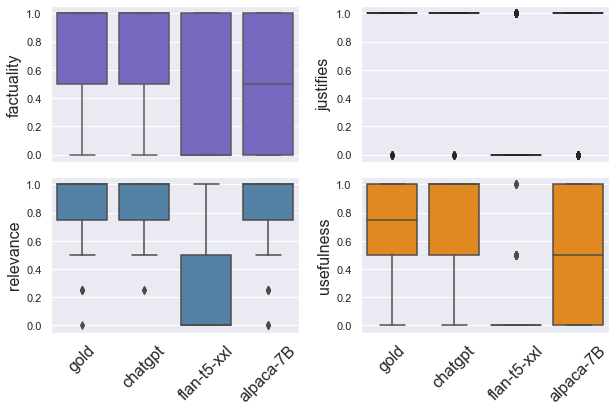

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

if if_top3_models:
    xticks_order = top_3models
else:
    xticks_order = all_6models


# plot boxplots in each subplot
sns.boxplot(data=eval_df_copy, x="Model", y="factuality", color="slateblue", ax=axes[0, 0], order=xticks_order)
sns.boxplot(data=eval_df_copy, x="Model", y="justifies", color="green", ax=axes[0, 1], order=xticks_order)
sns.boxplot(data=eval_df_copy, x="Model", y="relevance", color="steelblue", ax=axes[1, 0], order=xticks_order)
sns.boxplot(data=eval_df_copy, x="Model", y="usefulness", color="darkorange", ax=axes[1, 1], order=xticks_order)

axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')
axes[1, 1].set_xlabel('')
axes[1, 0].set_xlabel('')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.25, hspace=0.1)

# Remove xticks labels from the top two plots
axes[0, 0].set_xticks([])
axes[0, 1].set_xticks([])

# Set font size for xticks labels on all subplots
axes[1, 0].tick_params(axis='x', labelsize=16, rotation=45)
axes[1, 1].tick_params(axis='x', labelsize=16, rotation=45)

# Set font size for y-axis labels on all subplots
# Set font size for y-axis label on all subplots
axes[0, 0].set_ylabel("factuality", fontsize=16)
axes[0, 1].set_ylabel("justifies", fontsize=16)
axes[1, 0].set_ylabel("relevance", fontsize=16)
axes[1, 1].set_ylabel("usefulness", fontsize=16)

if if_top3_models == True:
    plt.savefig('./EVAL_results-TOP3.pdf', dpi=800, bbox_inches='tight', format="pdf")
else:
    plt.savefig('./EVAL_results-ALL6.pdf', dpi=800, bbox_inches='tight', format="pdf")
plt.show()